# Student Information

- Name:
- Student ID:
- GitHub ID:
- Kaggle_name:

# 0.資料與環境準備
* 說明：因為每次都要上傳資料，所以我寫了簡單的步驟，這樣可以很快把環境準備好

0. kaggle 的預設環境設定 
1. 從 github 下載資料 https://github.com/cyiping/DM2024-Lab2-Master.git
2. 切換工作目錄到 /content/DM2024-Lab2-Master
3. 連接(mount) Google Drive
4. 從 google Drive 把預先訓練資料 GoogleNews-vectors-negative300.bin.gz 拷貝到工作目錄





In [8]:
# 這是 kaggle 的預設環境設定 

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/DM2024-Lab2-Master.ipynb
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/README.md
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/Lab2_on_Colab.ipynb
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic2.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic9.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/example1.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic0.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic10.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic6.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic1.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/example2.jpg
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic3.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic5.png
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/monkey.jpg
/kaggle/input/dm2024-lab-master/DM2024-Lab2-Master/pics/pic8.png
/

In [9]:
# 從 github 下載資料
!git clone https://github.com/cyiping/DM2024-Lab2-Master.git

fatal: destination path 'DM2024-Lab2-Master' already exists and is not an empty directory.


In [10]:
# 2. 切換工作目錄
import os
os.chdir('/kaggle/working/DM2024-Lab2-Master')


In [12]:
# 確認一下
!pwd
!mkdir GoogleNews
!ls -al 

/kaggle/working/DM2024-Lab2-Master
total 17912
drwxr-xr-x 7 root root    4096 Nov 24 08:24 .
drwxr-xr-x 4 root root    4096 Nov 24 08:22 ..
drwxr-xr-x 8 root root    4096 Nov 24 08:22 .git
-rw-r--r-- 1 root root 4991824 Nov 24 08:22 DM2024-Lab2-Master.ipynb
drwxr-xr-x 2 root root    4096 Nov 24 08:24 GoogleNews
-rw-r--r-- 1 root root 6986334 Nov 24 08:22 Lab2_on_Colab.ipynb
-rw-r--r-- 1 root root     154 Nov 24 08:22 README.md
drwxr-xr-x 3 root root    4096 Nov 24 08:22 data
-rw-r--r-- 1 root root 6325877 Nov 24 08:22 kaggle-lab2.ipynb
drwxr-xr-x 2 root root    4096 Nov 24 08:22 logs
drwxr-xr-x 2 root root    4096 Nov 24 08:22 pics


In [14]:
!pip install gdown

In [15]:
# 從 google Drive 把預先訓練資料 GoogleNews-vectors-negative300.bin.gz 拷貝到工作目錄
import os

# 1. 確保目標目錄存在
os.makedirs('/kaggle/working/DM2024-Lab2-Master/GoogleNews', exist_ok=True)

# 2. 使用 gdown 下載文件到目標目錄
!gdown 'https://drive.google.com/uc?id=1qqLXNv3iv-27o6snpVO99F2mbuMlvyrL' -O /kaggle/working/DM2024-Lab2-Master/GoogleNews/GoogleNews-vectors-negative300.bin.gz


Downloading...
From (original): https://drive.google.com/uc?id=1qqLXNv3iv-27o6snpVO99F2mbuMlvyrL
From (redirected): https://drive.google.com/uc?id=1qqLXNv3iv-27o6snpVO99F2mbuMlvyrL&confirm=t&uuid=0b3e40e0-5a77-48b6-935b-3b22b3eaeb5d
To: /kaggle/working/DM2024-Lab2-Master/GoogleNews/GoogleNews-vectors-negative300.bin.gz
100%|██████████████████████████████████████| 1.65G/1.65G [00:33<00:00, 49.0MB/s]


# 1. Lab 2 Exercise
- home exercises in the DM2024-Lab2-master Repo

---
### **>>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [16]:
!pip install pandas

In [17]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [18]:
anger_train

id                                               text emotion  \
0    10000  How the fu*k! Who the heck! moved my fridge!.....   anger   
1    10001  So my Indian Uber driver just called someone t...   anger   
2    10002  @DPD_UK I asked for my parcel to be delivered ...   anger   
3    10003  so ef whichever butt wipe pulled the fire alar...   anger   
4    10004  Don't join @BTCare they put the phone down on ...   anger   
..     ...                                                ...     ...   
852  10852   rose incense are the best thing I've ever bought   anger   
853  10853         @jaaames1993 Literally burst out laughing.   anger   
854  10854           Follow up. Follow through. Be . #success   anger   
855  10855  Wrinkles should merely hide where frown have b...   anger   
856  10856  Love the new song I can't stop thinking about ...   anger   

     intensity  
0        0.938  
1        0.896  
2        0.896  
3        0.896  
4        0.896  
..         ...  
852      0.125  
853      0.067  
854      0.125  
855      0.125  
856      0.083  

[857 rows x 4 columns]

In [19]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [20]:
train_df

id                                               text  emotion  \
0     10000  How the fu*k! Who the heck! moved my fridge!.....    anger   
1     10001  So my Indian Uber driver just called someone t...    anger   
2     10002  @DPD_UK I asked for my parcel to be delivered ...    anger   
3     10003  so ef whichever butt wipe pulled the fire alar...    anger   
4     10004  Don't join @BTCare they put the phone down on ...    anger   
...     ...                                                ...      ...   
3608  40781  @VivienLloyd Thank you so much! Just home - st...  sadness   
3609  40782              Just put the winter duvet on ☃️❄️🌬☔️   sadness   
3610  40783  @SilkInSide @TommyJoeRatliff that's so pretty!...  sadness   
3611  40784  @BluesfestByron second artist announcement loo...  sadness   
3612  40785  I can literally eat creamy pesto pasta topped ...  sadness   

      intensity  
0         0.938  
1         0.896  
2         0.896  
3         0.896  
4         0.896  
...         ...  
3608      0.104  
3609      0.104  
3610      0.088  
3611      0.083  
3612      0.083  

[3613 rows x 4 columns]

In [21]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

id                                               text emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896

In [22]:
# shuffle dataset 隨機打亂（shuffle）資料集的順序
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print('ok')

ok


In [23]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


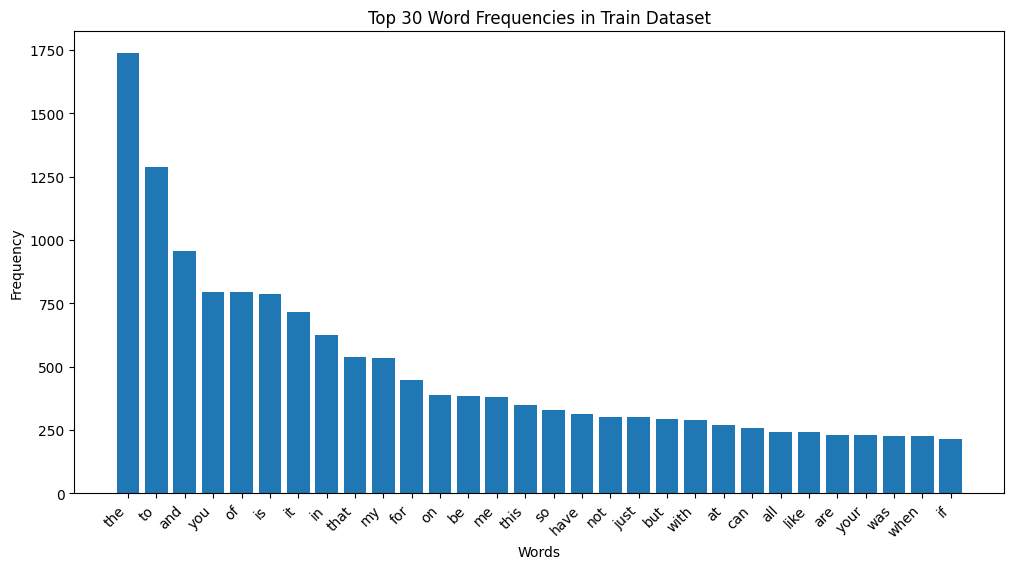

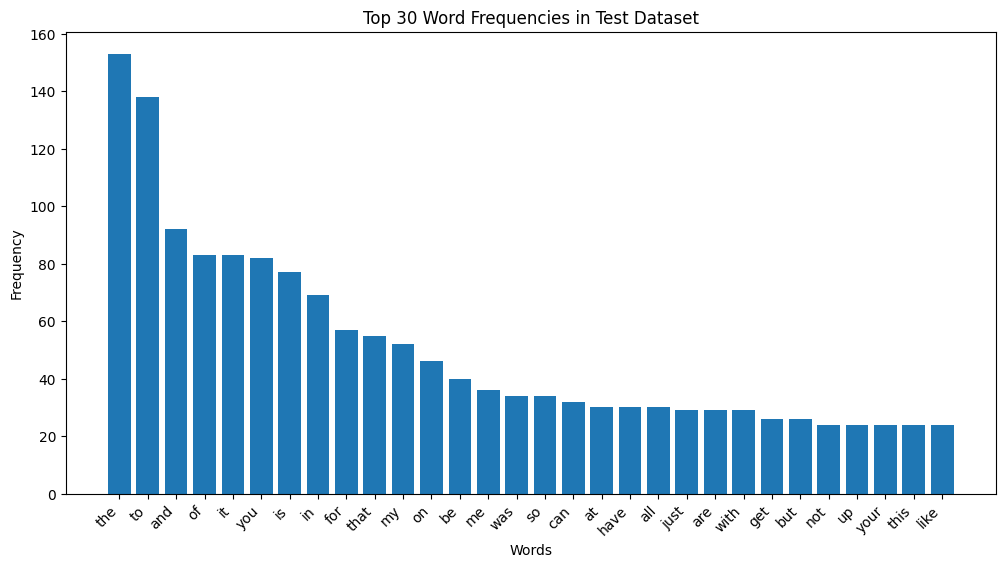

In [25]:
# Answer :
# 出現頻度上位 30 個の単語を見つけて、絵を描いて提示します。

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# train = pd.DataFrame({'text': [...]})  # Load your train dataset here
# test = pd.DataFrame({'text': [...]})   # Load your test dataset here

train = train_df
test = test_df

# Function to calculate and plot top 30 word frequencies

def plot_top_words(data, dataset_name, top_n=30):
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()
    # Fit and transform the text data
    word_counts = vectorizer.fit_transform(data['text'])
    # Sum up the occurrences of each word
    word_sums = word_counts.sum(axis=0)
    # Get the words and their corresponding counts
    words_freq = [(word, word_sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    # Sort words by frequency
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    # Split words and counts for plotting
    words, counts = zip(*sorted_words)

# Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Word Frequencies in {dataset_name} Dataset')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Usage
plot_top_words(train, 'Train')
plot_top_words(test, 'Test')




---
###  1.2 Save data
We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.

In [26]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [27]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [28]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

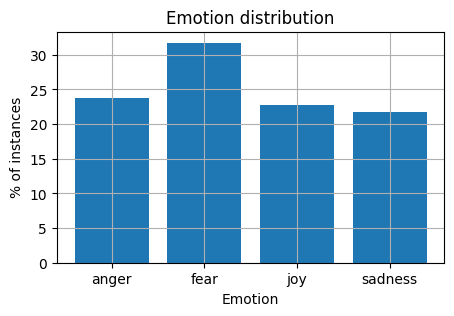

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [33]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [34]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [35]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [36]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [38]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [39]:
"😂" in feature_names

False

## Let's try using another tokenizer below.

In [40]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [41]:
!pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.


In [42]:
# 整合成功版本
# 處理 nltk 資料路徑問題
import nltk

# 如果有問題，可以指定 nltk 資料路徑
nltk.data.path.append('/path/to/nltk_data')  # 替換為適合的路徑
nltk.download('punkt')  # 確保 punkt 資料下載完成

# 如果 nltk 的內建分詞器問題持續，則使用自訂分詞器
import re
from sklearn.feature_extraction.text import CountVectorizer

# 定義自訂分詞器
def simple_tokenizer(text):
    """
    自訂簡單的分詞器：將文字轉為小寫，並使用正則表達式提取單字
    """
    return re.findall(r'\b\w+\b', text.lower())

# 初始化 CountVectorizer，使用自訂分詞器
BOW_500 = CountVectorizer(max_features=500, tokenizer=simple_tokenizer)

# 假設 train_df 是你的訓練資料，包含 'text' 欄位
BOW_500.fit(train_df['text'])  # 擬合訓練資料
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])  # 轉換為特徵矩陣

# 確認特徵矩陣的維度
print(train_data_BOW_features_500.shape)  # 顯示 (樣本數, 特徵數)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
(3613, 500)


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re

# 載入數據（請根據你的實際數據路徑修改）
train_df = pd.read_pickle("train_df.pkl")

# 定義自定義分詞器
def custom_tokenizer(text):
    """
    自訂分詞器：將文字轉為小寫，並使用正則表達式提取單字和標點符號
    """
    tokens = re.findall(r'\b\w+\b|[^\w\s]', text.lower())
    return tokens

# 初始化 CountVectorizer，使用自定義分詞器和設定特徵數量
BOW_500 = CountVectorizer(max_features=500, tokenizer=custom_tokenizer)

# 擬合訓練資料
BOW_500.fit(train_df['text'])

# 轉換為特徵矩陣
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# 顯示特徵矩陣的維度和部分內容（用於確認結果）
print("特徵矩陣的維度：", train_data_BOW_features_500.shape)
print("特徵矩陣的部分內容：")
# print(train_data_BOW_features_500.toarray()[:5]) # 顯示前 5 筆數據的特徵

train_data_BOW_features_500.toarray()

特徵矩陣的維度： (3613, 500)
特徵矩陣的部分內容：


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [2, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [44]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [2, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [45]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['customer', 'd', 'dark', 'day', 'days', 'delight', 'depressing',
       'depression', 'despair', 'did'], dtype=object)

In [46]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [47]:
train_df['text']

855     Wrinkles should merely hide where frown have b...
1091    @Delta stuck on runway after being diverted to...
3167    @theJeremyVine Noel Edmonds reckons a cat he's...
2829                         Feeling worthless as always 
2906    @jeremycorbyn @magstogether my god is @jeremyc...
                              ...                        
2447    When something makes you excited, terrified, t...
1914    Fear blocks blessings, faith unlocks them. #Ma...
2535        The Quarterback' wrecks me every time.. #glee
2465    I assume that people pick up on my joviality c...
2309    promise of restoration to the nation of israel...
Name: text, Length: 3613, dtype: object

In [48]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# 假設 train_df 已經載入並且包含一個名為 'text' 的欄位，該欄位存放文本數據
# 此處的 train_df 應為實際資料集的 DataFrame

# 定義 TF-IDF 向量生成器並設定 1000 個特徵
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# 使用 TF-IDF 向量生成器擬合訓練資料的 'text' 欄位，生成特徵向量
tfidf_vectorizer.fit(train_df['text'])

# 取得特徵名稱，並顯示索引 100 到 110 的特徵名稱
feature_names = tfidf_vectorizer.get_feature_names_out()[100:110]

# 顯示特徵名稱的輸出
print(feature_names)


['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [50]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'sadness', 'joy', 'sadness', 'fear', 'fear', 'anger',
       'sadness', 'fear', 'fear'], dtype=object)

---
## 4. Results Evaluation
Now we will check the results of our model's performance

In [51]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [52]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.67      0.61      0.64        84
        fear       0.69      0.75      0.72       110
         joy       0.65      0.70      0.67        79
     sadness       0.62      0.57      0.59        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.65       347
weighted avg       0.66      0.66      0.66       347



In [53]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[51 14 10  9]
 [ 9 82 10  9]
 [ 9  7 55  8]
 [ 7 15 10 42]]


In [54]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()


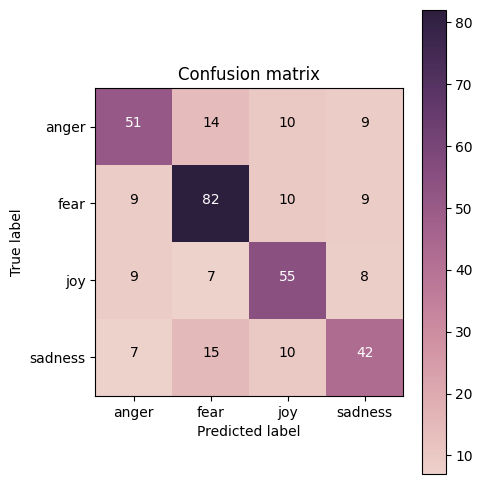

In [55]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here

### Analysis of Results

#### 1. **Confusion Matrix**
The confusion matrix displays the model's performance in classifying emotions:

| **True Label / Predicted Label** | Anger | Fear | Joy | Sadness |
|----------------------------------|-------|------|-----|---------|
| **Anger**                        | 51    | 14   | 10  | 9       |
| **Fear**                         | 9     | 82   | 10  | 9       |
| **Joy**                          | 9     | 7    | 55  | 8       |
| **Sadness**                      | 7     | 15   | 10  | 42      |

Key Observations:
- Most "Fear" samples are correctly predicted (82 correct out of 110).
- "Sadness" is often misclassified as "Fear" (15 cases).

#### 2. **Accuracy**
- **Training Accuracy:** `0.99`
  - Extremely high, indicating overfitting.
- **Testing Accuracy:** `0.66`
  - Significant drop, showing poor generalization on unseen data.

#### 3. **Precision, Recall, and F1-Score**

| **Class**   | **Precision** | **Recall** | **F1-Score** | **Support** |
|-------------|---------------|------------|--------------|-------------|
| Anger       | 0.67          | 0.61       | 0.64         | 84          |
| Fear        | 0.69          | 0.75       | 0.72         | 110         |
| Joy         | 0.65          | 0.70       | 0.67         | 79          |
| Sadness     | 0.62          | 0.57       | 0.59         | 74          |
| **Macro Avg** | 0.66          | 0.65       | 0.65         | 347         |
| **Weighted Avg** | 0.66      | 0.66       | 0.66         | 347         |

Key Points:
- "Fear" has the best performance (F1-score: 0.72).
- "Sadness" performs the worst (F1-score: 0.59).

#### 4. **Overfitting Indicator**
- Training accuracy (0.99) far exceeds testing accuracy (0.66).
- The model memorizes training data but struggles to generalize.

---

### Recommendations

1. **Overfitting Mitigation**
   - Add regularization (e.g., dropout, L2 regularization).
   - Use early stopping during training.
   - Reduce model complexity if applicable.

2. **Class Imbalance Handling**
   - Augment data for minority classes like "Sadness."
   - Use class weights in the loss function to emphasize underperforming classes.

3. **Evaluation and Validation**
   - Implement k-fold cross-validation to improve model evaluation.
   - Use stratified sampling to ensure balanced splits during training.

4. **Hyperparameter Tuning**
   - Experiment with learning rates, batch sizes, and optimizers.
   - Consider alternative model architectures (e.g., transformer-based models).

5. **Performance Metrics**
   - Monitor precision and recall trends for minority classes to ensure improvements are balanced across all labels.

### Explanation of the Confusion Matrix

This diagram is a confusion matrix, commonly used to evaluate the performance of classification models. Below is an explanation of the chart:

#### Structure of the Confusion Matrix:
- **Vertical Axis (True Label):**
  - Represents the actual labels, indicating the true emotional categories of the data (`anger`, `fear`, `joy`, `sadness`).
- **Horizontal Axis (Predicted Label):**
  - Represents the predicted labels, indicating the emotion categories predicted by the model.
- **Numeric Values:**
  - Each cell in the matrix represents the number of samples for a particular classification. For example:
    - The top-left number "61" indicates 61 samples with the true label `anger` were correctly predicted as `anger`.

#### Key Observations:
1. **Correct Classifications (Diagonal Numbers):**
   - Numbers on the diagonal represent the correctly classified samples. For example:
     - `anger`: 61 samples were correctly classified as `anger`.
     - `fear`: 78 samples were correctly classified as `fear`.
     - Similarly for other categories.

2. **Misclassifications (Off-Diagonal Numbers):**
   - Numbers outside the diagonal indicate incorrect classifications. For example:
     - 9 samples with the true label `anger` were misclassified as `joy`.
     - 14 samples with the true label `fear` were misclassified as `anger`.
   - These values indicate where the model tends to confuse one class with another.

#### Performance Summary:
- **Best Performance:**
  - The model performs best on `fear`, with 78 samples correctly classified.
- **High Error Rate:**
  - The classification for `sadness` shows the highest confusion, with 15 samples misclassified as `anger`.

#### Conclusion:
The confusion matrix reveals the overall performance of the model. Most samples are correctly classified, but there is noticeable confusion between certain emotion categories. For example:
- The model struggles to differentiate between `anger` and `fear`.
- Similarly, there is confusion between `sadness` and `anger`.

#### Optimization Directions:
- Improve feature selection to better distinguish between similar classes.
- Consider adopting a more complex model or fine-tuning the existing one to reduce misclassification and enhance overall classification accuracy.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

#### [Answer here]
### 單純貝氏(Naive Bayes) 模型通常適合用於文本分類，且在高維數據上效果良好。
* 準確率 (Accuracy)：顯示模型在測試集上整體的準確性。
* 分類報告 (Classification Report)：提供每個情緒類別的精確率 (precision)、召回率 (recall) 和 F1 分數，方便檢查模型在每個類別的表現。
* 混淆矩陣 (Confusion Matrix)：顯示模型在各情緒類別上的正確分類與錯誤分類情況，幫助觀察模型在哪些情緒類別之間易出現混淆。

In [56]:
print(train_df.columns)

Index(['id', 'text', 'emotion', 'intensity'], dtype='object')


準確率: 0.7773167358229599

分類報告:
               precision    recall  f1-score   support

       anger       0.81      0.76      0.78       173
        fear       0.71      0.93      0.80       245
         joy       0.89      0.69      0.77       150
     sadness       0.80      0.65      0.72       155

    accuracy                           0.78       723
   macro avg       0.80      0.76      0.77       723
weighted avg       0.79      0.78      0.77       723


混淆矩陣:
 [[131  27   5  10]
 [  9 227   3   6]
 [  8  29 103  10]
 [ 13  36   5 101]]


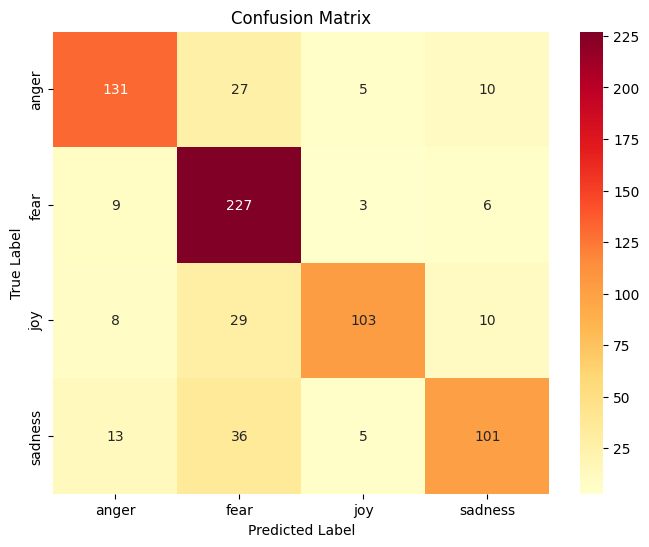

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 假設 train_df 已經載入並且包含 'text' 和 'emotion' 欄位，分別表示文本數據和其對應的情緒標籤

# 第一步：準備數據
# 將數據分為訓練集和測試集（例如，80% 用於訓練，20% 用於測試）
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['emotion'], test_size=0.2, random_state=42)

# 第二步：將文本數據轉換為 TF-IDF 特徵
# 使用 1000 個特徵，與之前的練習保持一致
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# 將訓練數據進行擬合並轉換為 TF-IDF 特徵矩陣，測試數據進行轉換
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 第三步：訓練 Naive Bayes 模型
# 使用 MultinomialNB 模型，這種模型適合文本分類
nb_model = MultinomialNB()

# 在訓練數據上擬合模型
nb_model.fit(X_train_tfidf, y_train)

# 第四步：在測試集上進行預測
y_pred = nb_model.predict(X_test_tfidf)

# 第五步：評估模型
# 計算準確率、分類報告和混淆矩陣
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# 顯示結果
print("準確率:", accuracy)
print("\n分類報告:\n", classification_rep)
print("\n混淆矩陣:\n", confusion_mat)

# 第六步：繪製混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlOrRd', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Analysis of Results### Analysis of Results

#### 1. **Overall Accuracy**
- **Accuracy:** `0.7773`
  - The model achieves an accuracy of approximately 77.7% on the dataset, which indicates reasonably good performance for a multi-class classification task.

---

#### 2. **Classification Report**

| **Class**   | **Precision** | **Recall** | **F1-Score** | **Support** |
|-------------|---------------|------------|--------------|-------------|
| Anger       | 0.81          | 0.76       | 0.78         | 173         |
| Fear        | 0.71          | 0.93       | 0.80         | 245         |
| Joy         | 0.89          | 0.69       | 0.77         | 150         |
| Sadness     | 0.80          | 0.65       | 0.72         | 155         |

- **Precision:** Measures how many predictions for each class were correct.
  - `Joy` has the highest precision (0.89), meaning it rarely predicts `Joy` incorrectly.
  - `Fear` has the lowest precision (0.71), indicating it predicts `Fear` less precisely compared to other classes.
  
- **Recall:** Measures how well the model identifies all true samples for each class.
  - `Fear` has the highest recall (0.93), meaning most true `Fear` samples are identified correctly.
  - `Sadness` has the lowest recall (0.65), suggesting many true `Sadness` samples are misclassified.

- **F1-Score:** A harmonic mean of precision and recall.
  - The highest F1-Score is for `Fear` (0.80), indicating it is the most balanced in terms of precision and recall.
  - The lowest F1-Score is for `Sadness` (0.72), suggesting room for improvement in both precision and recall.

- **Macro Average:**
  - `Precision`: 0.80
  - `Recall`: 0.76
  - `F1-Score`: 0.77
  - These scores treat all classes equally, providing an overall measure of the model's balance across classes.

- **Weighted Average:**
  - `Precision`: 0.79
  - `Recall`: 0.78
  - `F1-Score`: 0.77
  - These scores take into account the number of samples in each class, reflecting the overall performance weighted by class size.

---

#### 3. **Confusion Matrix**

| **True Label / Predicted Label** | Anger | Fear | Joy | Sadness |
|----------------------------------|-------|------|-----|---------|
| **Anger**                        | 131   | 27   | 5   | 10      |
| **Fear**                         | 9     | 227  | 3   | 6       |
| **Joy**                          | 8     | 29   | 103 | 10      |
| **Sadness**                      | 13    | 36   | 5   | 101     |

**Key Observations:**
1. **Correct Classifications (Diagonal):**
   - `Anger`: Correctly classified 131 out of 173 samples (76%).
   - `Fear`: Correctly classified 227 out of 245 samples (93%).
   - `Joy`: Correctly classified 103 out of 150 samples (69%).
   - `Sadness`: Correctly classified 101 out of 155 samples (65%).

2. **Misclassifications (Off-Diagonal):**
   - `Anger` is often misclassified as `Fear` (27 samples).
   - `Sadness` is frequently misclassified as `Fear` (36 samples), indicating confusion between these classes.
   - `Joy` is occasionally misclassified as `Fear` (29 samples).

---

### Key Insights and Recommendations

#### 1. **Strengths:**
- The model performs well on the `Fear` class, with high recall (0.93) and F1-score (0.80).
- Overall accuracy (77.7%) indicates reasonable performance on this multi-class classification task.

#### 2. **Weaknesses:**
- Significant confusion exists between `Fear` and other classes, especially `Sadness`.
- The `Joy` and `Sadness` classes show lower recall, indicating many true samples are misclassified.

#### 3. **Recommendations for Improvement:**
1. **Handle Class Confusion:**
   - Investigate feature overlap between `Fear` and `Sadness` to reduce misclassifications.
   - Consider more granular emotion features or embeddings to better distinguish between these emotions.

2. **Improve Recall for Weak Classes:**
   - Augment data for `Sadness` and `Joy` to improve model recognition of these classes.
   - Experiment with loss function weighting to prioritize underperforming classes.

3. **Regularization and Hyperparameter Tuning:**
   - Introduce regularization techniques like dropout or L2 regularization to reduce noise in predictions.
   - Tune hyperparameters such as learning rate, batch size, and optimizer.

4. **Advanced Models:**
   - Explore transformer-based models (e.g., BERT, RoBERTa) for better contextual understanding.
   - Incorporate domain-specific embeddings if available.

5. **Cross-Validation:**
   - Use k-fold cross-validation to validate performance consistency across different splits of the dataset.
 cross-validation to validate performance consistency across different splits of the dataset.


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Comparison of Naive Bayes and Decision Tree Models

The comparison between the Naive Bayes model and the Decision Tree model highlights differences in accuracy, stability, and interpretability. Below is a detailed analysis of these differences:

---

### Results Comparison

1. **Accuracy and Performance**:
   - **Naive Bayes**: 
     - Performs well on text classification tasks, especially with high-dimensional and sparse data.
     - Relies on the conditional independence assumption, which simplifies computation and makes it efficient at handling large numbers of features.
   - **Decision Tree**:
     - May perform worse on such datasets, particularly when there are complex relationships between features that it struggles to capture.

2. **Error Rate and Class Differentiation**:
   - **Naive Bayes**:
     - Offers more stable performance in multi-class problems, with fewer misclassifications due to its probabilistic approach.
   - **Decision Tree**:
     - Tends to have higher misclassification rates, particularly for borderline classes or imbalanced datasets.
     - Can be sensitive to data distribution and prone to overfitting.

3. **Interpretability**:
   - **Decision Tree**:
     - Highly interpretable, as it provides a clear decision path, making it easier to understand how the model classifies each sample.
   - **Naive Bayes**:
     - Less interpretable since it relies purely on probability calculations without a visual decision process.

---

### Theoretical Background

1. **Naive Bayes Model**:
   - Based on the assumption of conditional independence, where each feature is assumed to be independent given the class.
   - While this assumption might not always hold true, it works well for high-dimensional text data by simplifying computations.
   - **Advantages**:
     - Suitable for high-dimensional and sparse data.
     - Fast training and prediction.
     - Less prone to overfitting.
   - **Disadvantages**:
     - Performance decreases when strong dependencies exist between features.

2. **Decision Tree Model**:
   - Operates by recursively splitting the data based on feature importance, creating a tree-like structure that defines the classification rules.
   - Handles complex relationships between features effectively.
   - **Advantages**:
     - Highly interpretable.
     - Can capture feature dependencies.
     - Suitable for low- or medium-dimensional data.
   - **Disadvantages**:
     - Prone to overfitting.
     - Unstable on high-dimensional or sparse data.
     - Performs poorly on imbalanced datasets.

---

### Conclusion

In summary:
- **Naive Bayes** excels in high-dimensional, sparse text classification tasks due to its ability to handle large numbers of features and avoid overfitting.
- **Decision Tree** is better suited for datasets with fewer features and strong dependencies among them.

The choice of the model depends on the dataset's characteristics. Selecting the right model ensures optimal classification performance.


---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

### 6.1 Prepare data (X, y)

### tensorflow 安裝完畢之後需要重啟 kernel
重啟之後這一段不用執行

In [63]:
!pip install keras
!pip install tensorflow

In [64]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [65]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4302 stored elements and shape (347, 500)>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.

In [66]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 855       anger
1091       fear
3167    sadness
2829    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [67]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [69]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [70]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3160 - loss: 1.3645 - val_accuracy: 0.3977 - val_loss: 1.2961
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5412 - loss: 1.1430 - val_accuracy: 0.5965 - val_loss: 0.9995
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.6813 - val_accuracy: 0.6398 - val_loss: 0.8943
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.4476 - val_accuracy: 0.6744 - val_loss: 0.8535
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8892 - loss: 0.3414 - val_accuracy: 0.6686 - val_loss: 0.8530
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9093 - loss: 0.2773 - val_accuracy: 0.6686 - val_loss: 0.9230
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9333 - loss: 0.2175 - val_accuracy: 0.6715 - val_loss: 0.9918
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.1733 - val_accuracy: 0.

### 6.5 Predict on testing data

In [71]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[1.64017156e-02, 4.00025215e-07, 3.12160552e-02, 9.52381909e-01],
       [1.11636847e-01, 7.22328667e-04, 8.00124311e-04, 8.86840641e-01],
       [5.21463808e-05, 4.82820951e-07, 9.99937117e-01, 1.00867146e-05],
       [9.98042285e-01, 1.02728845e-05, 5.53816280e-05, 1.89204945e-03],
       [5.66581322e-04, 4.43366468e-02, 4.84873250e-04, 9.54611897e-01]],
      dtype=float32)

In [72]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'sadness', 'joy', 'anger', 'sadness'], dtype=object)

In [73]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [74]:
# Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.358981  1.336424      0.397695  1.296127
1       1  0.597841  1.049182      0.596542  0.999535
2       2  0.781622  0.643803      0.639769  0.894284
3       3  0.834487  0.456035      0.674352  0.853510
4       4  0.873236  0.356907      0.668588  0.853036
5       5  0.903128  0.286453      0.668588  0.922980
6       6  0.925270  0.230831      0.671470  0.991813
7       7  0.940769  0.191241      0.674352  1.060355
8       8  0.949626  0.163794      0.668588  1.101498
9       9  0.959037  0.145331      0.657061  1.177944
10     10  0.965126  0.125907      0.671470  1.213232
11     11  0.968171  0.108268      0.662824  1.275663
12     12  0.970662  0.100406      0.645533  1.400243
13     13  0.969278  0.093523      0.659942  1.360972
14     14  0.971769  0.087799      0.662824  1.413213
15     15  0.973429  0.081914      0.671470  1.463980
16     16  0.975644  0.076602      0.642651  1.645670
17     17  0.974536  0.074534      0.648415  1.551628
18     18  0.973429  0.078840      0.677233  1.514792
19     19  0.975920  0.068308      0.659942  1.615893
20     20  0.972045  0.065719      0.668588  1.615104
21     21  0.977858  0.056137      0.657061  1.655059
22     22  0.977304  0.064163      0.665706  1.716818
23     23  0.979242  0.056115      0.648415  1.668403
24     24  0.978135  0.059528      0.648415  1.748148

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

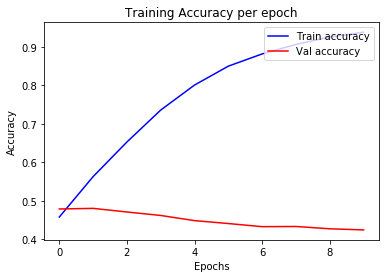

In [75]:
from IPython.display import Image
Image('/kaggle/working/DM2024-Lab2-Master/pics/pic3.png')

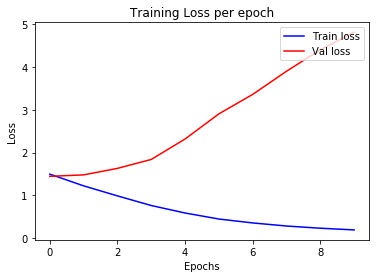

In [76]:
from IPython.display import Image
Image('/kaggle/working/DM2024-Lab2-Master/pics/pic4.png')

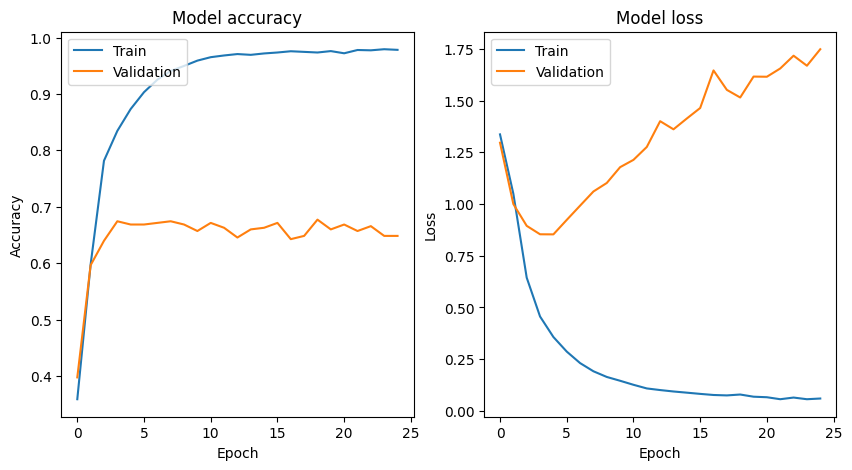

In [77]:
# Answer here

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Interpretation of the Graphs and Their Relation to Overfitting/Underfitting

#### 1. **Left Plot: Model Accuracy**
- **Training Accuracy** (blue line):
  - Rapidly increases and approaches close to 1.0 (100%) as training progresses.
- **Validation Accuracy** (orange line):
  - Increases initially, then plateaus and slightly decreases after a few epochs.

**Interpretation**:
- The gap between training and validation accuracy indicates **overfitting**. The model performs well on the training data but struggles to generalize.

---

#### 2. **Right Plot: Model Loss**
- **Training Loss** (blue line):
  - Consistently decreases, showing effective error minimization on the training data.
- **Validation Loss** (orange line):
  - Decreases initially but diverges and increases after several epochs.

**Interpretation**:
- Increasing validation loss while training loss decreases is a sign of **overfitting**. The model starts to memorize the training data instead of learning general patterns.

---

#### 3. **Relation to Overfitting/Underfitting**
- **Overfitting**:
  - Observed when:
    - Training accuracy is high, but validation accuracy stagnates or decreases.
    - Training loss is low, but validation loss increases.
  - Overfitting occurs when the model becomes too complex and focuses too much on the training data.

- **Underfitting**:
  - If both training and validation accuracy remained low or loss values stayed high, it would indicate **underfitting**. This occurs when the model is too simdd(Dropout(0.5))  # Example: Adding dropout


---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [78]:
!pip install nltk

In [79]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


id                                               text  \
855   10855  Wrinkles should merely hide where frown have b...   
1091  20234  @Delta stuck on runway after being diverted to...   
3167  40340  @theJeremyVine Noel Edmonds reckons a cat he's...   
2829  40002                       Feeling worthless as always    
2906  40079  @jeremycorbyn @magstogether my god is @jeremyc...   

                                         text_tokenized  
855   [Wrinkles, should, merely, hide, where, frown,...  
1091  [@, Delta, stuck, on, runway, after, being, di...  
3167  [@, theJeremyVine, Noel, Edmonds, reckons, a, ...  
2829                   [Feeling, worthless, as, always]  
2906  [@, jeremycorbyn, @, magstogether, my, god, is...

In [80]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Wrinkles', 'should', 'merely', 'hide', 'where', 'frown', 'have', 'been', '.', '-', 'Mark', 'Twain']),
       list(['@', 'Delta', 'stuck', 'on', 'runway', 'after', 'being', 'diverted', 'to', 'Fargo', '.', 'Continuously', 'told', 'just', '10', 'more', 'mins', 'for', 'the', 'past', '4', 'hours', '.', 'No', 'food/water', 'offered', '#', 'awful']),
       list(['@', 'theJeremyVine', 'Noel', 'Edmonds', 'reckons', 'a', 'cat', 'he', "'s", 'talking', 'to', 'is', 'stressed', 'because', 'of', 'the', 'uncertainty', 'over', '#', 'GBBO', 'future', '!', '?', '!', '?', '#', 'plot', '#', 'lost'])],
      dtype=object)

## 7.2 Training our model
You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [82]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [83]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.5549125 ,  0.294198  , -0.20147564,  0.1605511 , -0.09392735,
       -0.6045057 , -0.04842338,  1.3596805 , -0.00763682, -0.19158144,
       -0.74286044, -0.44110042, -0.7131019 ,  0.2809024 ,  0.2581126 ,
       -0.30767882,  0.05663146, -0.4249166 ,  0.01217667, -1.1082588 ,
        0.57568145,  0.8443481 ,  0.08428803, -0.4270337 , -0.18599962,
        0.07716868, -1.1118709 ,  0.26542065, -0.50549084, -0.04716632,
        0.34599227, -0.00551492,  0.84945047, -0.6897465 , -0.3622712 ,
        0.9143766 ,  0.4429025 , -0.01335312, -0.67369246, -0.1012493 ,
       -0.08383315, -0.01895874, -0.17802627,  0.18417497,  0.27787223,
       -0.3286137 , -0.87480426, -0.19474043,  0.73491985,  0.65737   ,
       -0.492401  , -0.73283273, -0.2903919 , -0.43077594, -0.25765622,
        0.03875442,  0.21065281, -0.8734879 ,  0.12564182,  0.19434062,
        0.01215827, -0.20139031,  0.80604535,  0.31776166, -0.5529178 ,
        0.6052987 , -0.11893902,  0.42754236, -1.1061028 ,  0.59

In [84]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9256834387779236),
 ('free', 0.9240054488182068),
 ('birthday', 0.9126411080360413),
 ('Really', 0.9086143970489502),
 ('Be', 0.9082297682762146),
 ('ukedchat', 0.9045084714889526),
 ('forever', 0.901638388633728),
 ('dad', 0.8983782529830933),
 ('Enjoy', 0.8965581655502319),
 ('Kik', 0.8939274549484253)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [85]:
!ls -al /kaggle/working/DM2024-Lab2-Master/GoogleNews/

total 1608456
drwxr-xr-x 2 root root       4096 Nov 24 08:25 .
drwxr-xr-x 7 root root       4096 Nov 24 08:27 ..
-rw-r--r-- 1 root root 1647046227 Nov 16 18:00 GoogleNews-vectors-negative300.bin.gz


In [86]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-dataa

In [88]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

## 7.5 king + woman - man = ?
Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [89]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?

現在，我們有了單字向量，但我們的輸入資料是單字序列（或句子）。
我們如何利用這些「單字」向量來表示句子資料並訓練我們的模型？

### Answer here

要利用單字向量來表示句子，可以按照以下簡單步驟進行：

1. **將句子的每個單字轉換成單字向量**：
   - 將句子中的每個單字轉換成對應的單字向量，這些向量能夠捕捉單字的意義。

2. **將單字向量組合為句子的向量表示**：
   - 因為句子由多個單字組成，我們需要一種方法來將單字向量結合成代表整個句子的向量。常見的方法包括：
     - **平均法**：計算句子中所有單字向量的平均值，得到一個代表句子整體意義的向量。
     - **加總法**：將所有單字向量相加（不平均），得到句子的向量表示。
     - **使用循環層（RNN）**：將單字向量序列輸入到 RNN 或 LSTM 中，由模型學習句子的綜合表示。
     - **使用 Transformer 模型**：像 BERT 這樣的進階模型可以直接處理單字向量序列，並產生句子的向量表示。

3. **訓練模型**：
   - 一旦句子被轉換為單一向量（或經過 RNN/Transformer 模型變成句子的向量表示），就可以將其作為輸入，進行機器學習模型的訓練。

---

### 簡單的例子
假設我們有一個句子 "I love cats"：
- 將 "I"、"love" 和 "cats" 分別轉換為單字向量，得到 `[v_I, v_love, v_cats]`。
- 將這些向量結合，例如用平均法：`sentence_vector = (v_I + v_love + v_cats) / 3`。
- 將 `sentence_vector` 作為輸入，用於模型的訓練。

這個過程可以確保句子被轉換成數值表示，並且可以被機器學習模型處理！


# 9. High-dimension Visualization: t-SNE and UMAP
No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

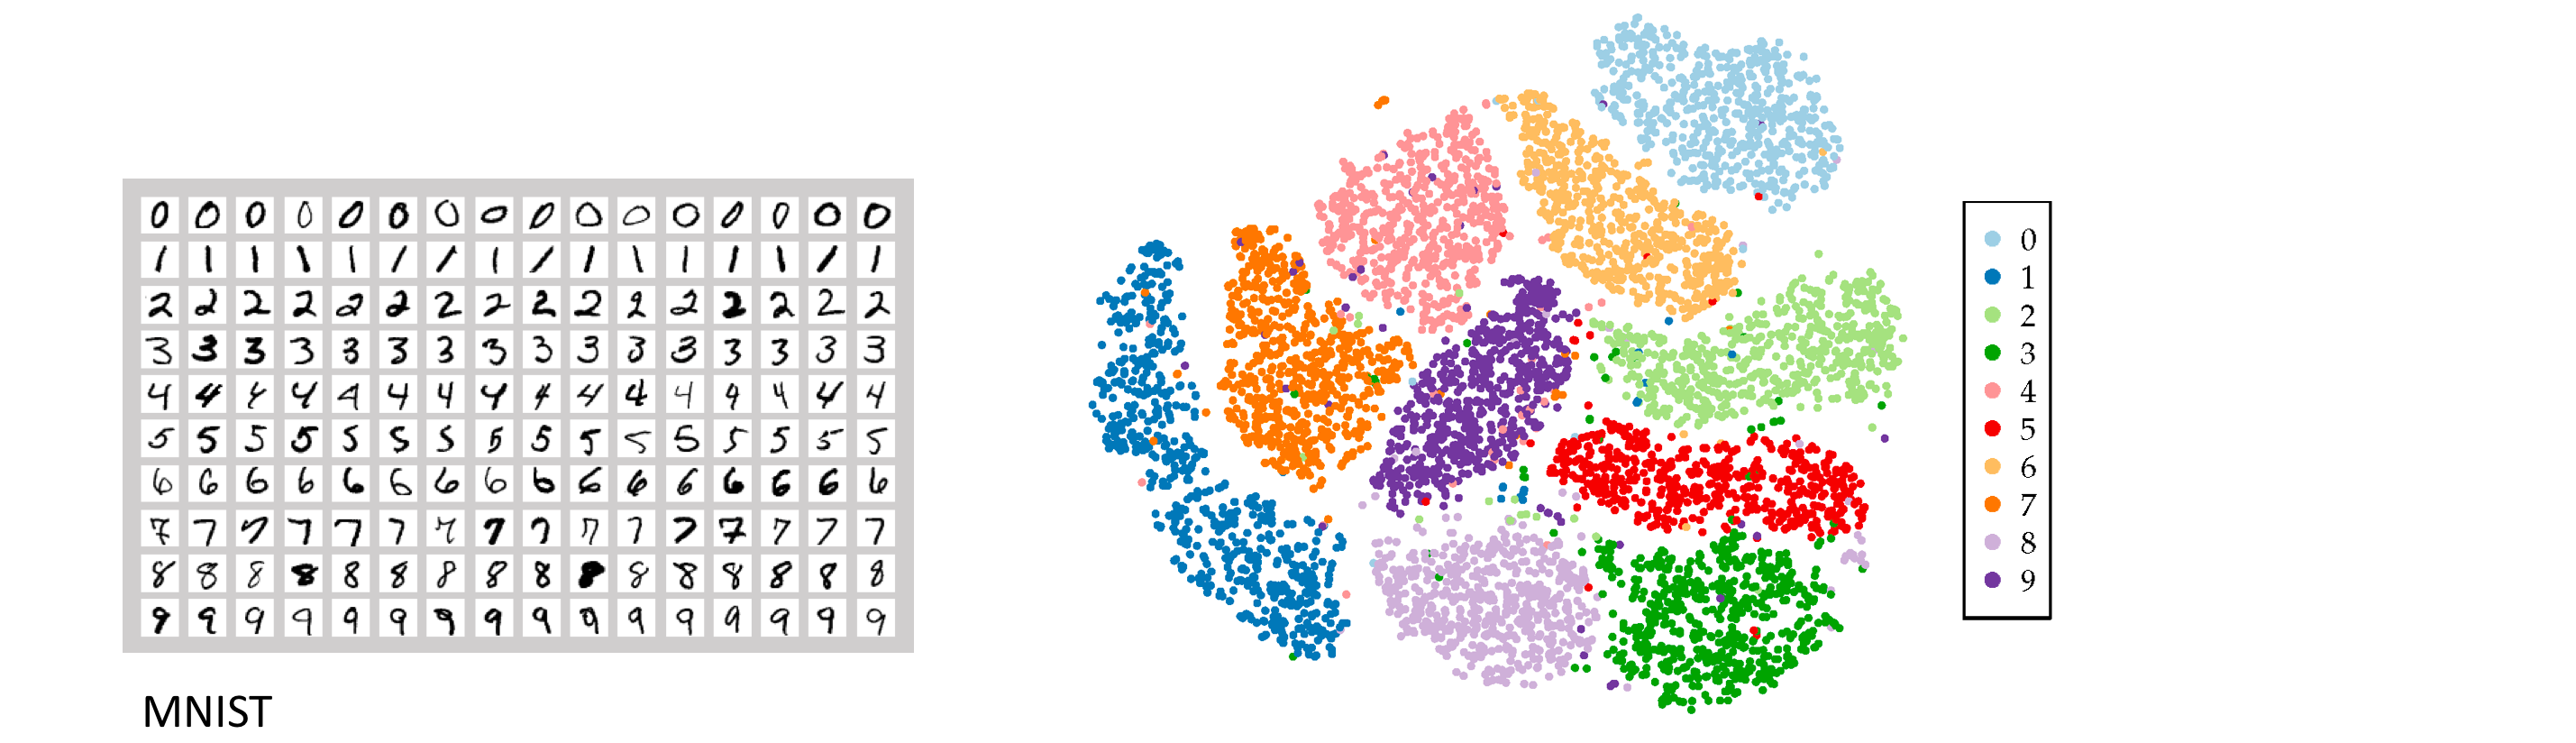

In [92]:
# picture
from IPython.display import Image
Image('/kaggle/working/DM2024-Lab2-Master/pics/pic7.png')

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

In [ ]:
# picture
from IPython.display import Image
Image('/kaggle/working/DM2024-Lab2-Master/pics/pic9.png')

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html https://umap-learn.readthedocs.io/en/latest/

## 9.1 Prepare visualizing target
Let's prepare data lists like:

happy words
angry words
data words
mining words

In [93]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


## 9.2 Plot using t-SNE and UMAP (2-dimension)


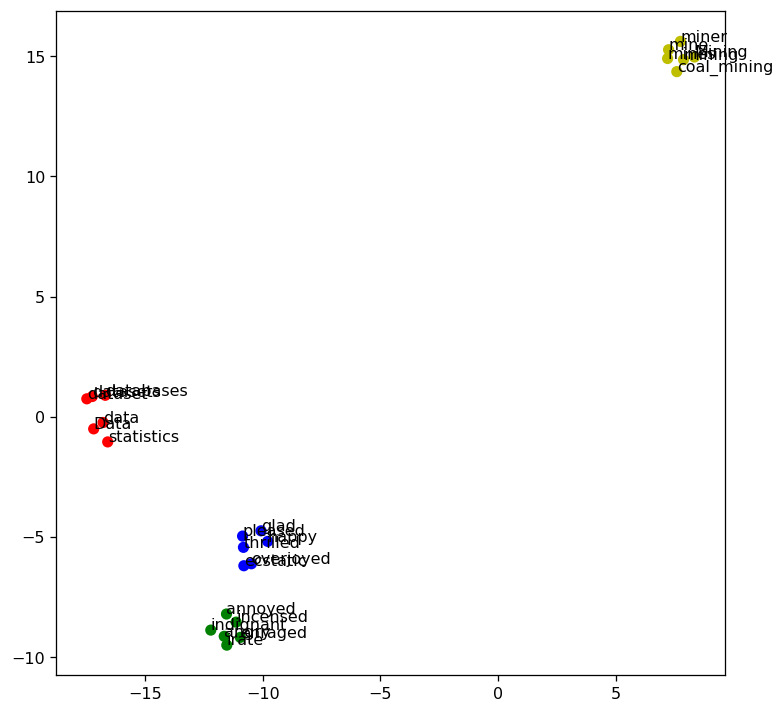

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [95]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


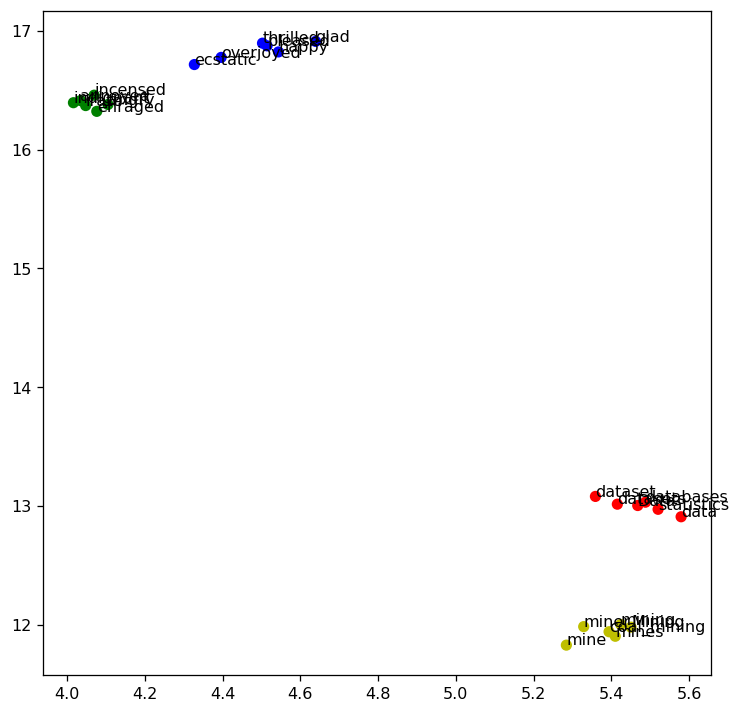

In [96]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## ** >>> Exercise 8 (Take home): **
Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [101]:
# Answer here

# 1. Prepare the data:

import nltk
import numpy as np
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model:
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"  # Update with the actual path if different
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Define the target words:
target_words = ["angry", "happy", "sad", "fear"]

# Get the most similar words for each target word:
topn = 15  # Number of similar words to retrieve

similar_words_dict = {}
for word in target_words:
    similar_words_dict[word] = [word] + [
        word_ for word_, sim_ in w2v_google_model.most_similar(word, topn=topn)
    ]

# Combine all similar words into a single list:
all_similar_words = [
    word for sublist in similar_words_dict.values() for word in sublist
]

# Get word vectors for all similar words:
word_vectors = [w2v_google_model[word] for word in all_similar_words]

print('ok')

ok


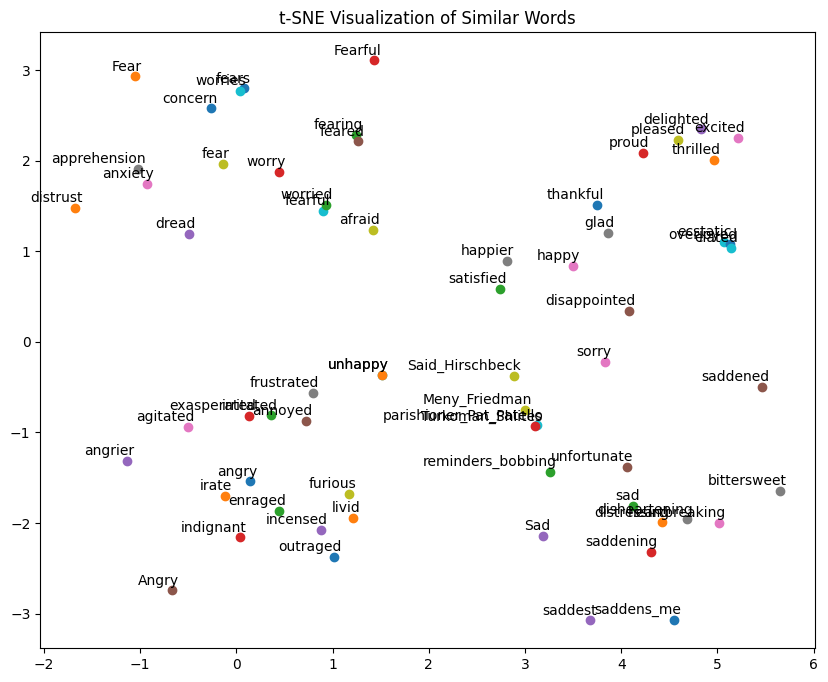

In [98]:
# [Answer]
# 2. Generate the t-SNE visualization:

# Import necessary libraries
import nltk
import numpy as np
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model (if not already loaded)
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Define the target words
target_words = ["angry", "happy", "sad", "fear"]

# Get the most similar words for each target word
topn = 15  # Number of similar words to retrieve

similar_words_dict = {}
for word in target_words:
    similar_words_dict[word] = [word] + [
        word_ for word_, sim_ in w2v_google_model.most_similar(word, topn=topn)
    ]

# Combine all similar words into a single list
all_similar_words = [
    word for sublist in similar_words_dict.values() for word in sublist
]

# Get word vectors for all similar words
word_vectors = [w2v_google_model[word] for word in all_similar_words]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
# Convert word_vectors to a NumPy array
word_vectors_np = np.array(word_vectors)  # convert list of arrays to a single array
tsne_embeddings = tsne.fit_transform(word_vectors_np)  # pass the numpy array

# Plot the t-SNE embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(all_similar_words):
    plt.scatter(tsne_embeddings[i, 0], tsne_embeddings[i, 1])
    plt.annotate(
        word,
        xy=(tsne_embeddings[i, 0], tsne_embeddings[i, 1]),
        xytext=(5, 2),
        textcoords="offset points",
        ha="right",
        va="bottom",
    )
plt.title("t-SNE Visualization of Similar Words")
plt.show()

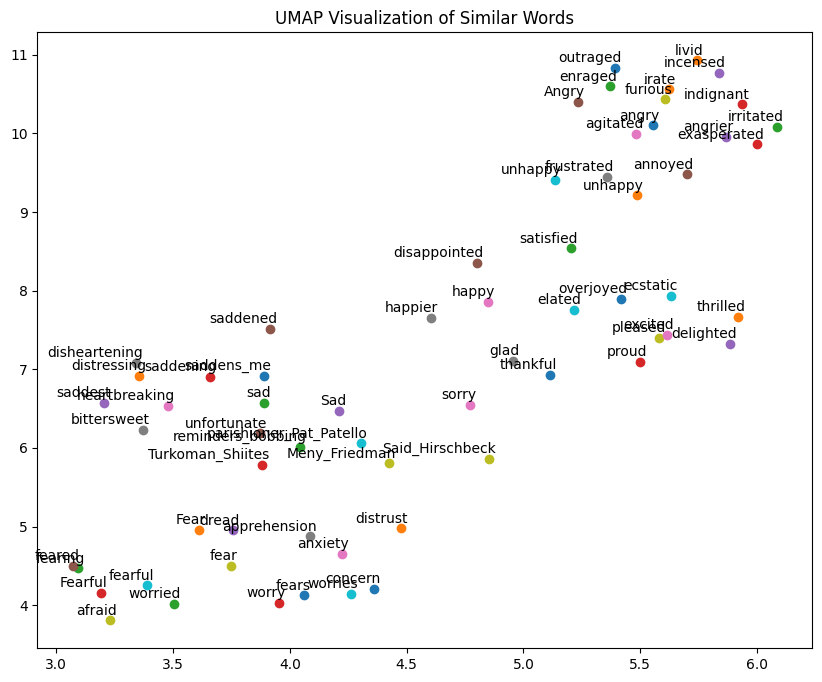

In [99]:
# [Answer]
# 3. Generate the UMAP visualization:
# Apply UMAP:
umap_reducer = umap.UMAP(random_state=42)
umap_embeddings = umap_reducer.fit_transform(word_vectors)

# Plot the UMAP embeddings:
plt.figure(figsize=(10, 8))
for i, word in enumerate(all_similar_words):
    plt.scatter(umap_embeddings[i, 0], umap_embeddings[i, 1])
    plt.annotate(
        word,
        xy=(umap_embeddings[i, 0], umap_embeddings[i, 1]),
        xytext=(5, 2),
        textcoords="offset points",
        ha="right",
        va="bottom",
    )
plt.title("UMAP Visualization of Similar Words")
plt.show()

#### [Answer]
4. Comparison of t-SNE and UMAP visualizations:

### Comparison of t-SNE and UMAP Visualizations

1. **Global Structure**:
   - UMAP generally preserves the global structure of the data better than t-SNE.
   - Clusters of similar words are more likely to be grouped together in the UMAP visualization.

2. **Local Structure**:
   - t-SNE often does a better job of preserving local structure.
   - It may show finer details within clusters, revealing more nuanced relationships.

3. **Computational Efficiency**:
   - UMAP is typically faster than t-SNE, especially for large datasets.

4. **Interpretability**:
   - Both t-SNE and UMAP are nonlinear dimensionality reduction techniques, making the resulting visualizations difficult to interpret definitively.
   - However, general patterns and clusters of similar words can often be observed.

5. **Application to Emotion Categories**:
   - In this specific case:
     - **UMAP**: Likely provides a clearer separation between different emotion categories.
     - **t-SNE**: May reveal more nuanced relationships within each emotion cluster.

6. **Conclusion**:
   - The choice between t-SNE and UMAP depends on:
     - The specific goals of the visualization (e.g., global vs. local patterns).
     - The characteristics of the data (e.g., dataset size and complexity).


# 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

## Open Source LLMs:
In this lab we are going to use Ollama (Ollama GitHub Link), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using 'llama3.2' or 'llama3.2:1b' for text based tasks, and 'llava-phi3' for multi-modal tasks (e.g. image to text). Ollama has a great variety of models, and those can be found here: model library. You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:

## Ollama 環境前置作業
0. kaggle 環境從這一段開始開 GPU
1. 下載 Ollama
2. 要執行 Ollama
3. 下載模型

In [1]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh

#Run ollama
import subprocess
# 啟動服務並隱藏所有輸出
process = subprocess.Popen("ollama serve > /dev/null 2>&1", shell=True)
print("Ollama is running")

#Download model
!ollama pull llama3.2 > /dev/null 2>&1
print("model pulled")

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0% 24.8%#####################################                              61.6%###############################                              62.5%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
Ollama is running
model pulled


In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

In [ ]:
display(Markdown(response['message']['content']))

## ** >>> Exercise 9 (Take home): **
You noticed there is a role parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the user one.

In [3]:
# prompt: You noticed there is a role parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the user one.

import ollama
from IPython.display import Markdown

response = ollama.chat(model='llama3.2', messages=[
    {'role': 'system', 'content': 'You are a helpful assistant that translates English to Japanese.'},
    {'role': 'user', 'content': 'Translate "Hello, how are you?" to Japanese.'}
])

print(response['message']['content'])
display(Markdown(response['message']['content']))

The translation of "Hello, how are you?" in Japanese is:

"Ohayou gozaimasu. Kanpai desu ka?"

Here's a breakdown of the words:

* Ohayou (おはよう) means "hello" or "good morning".
* Gozaimasu (ごzaいます) is a polite form of address, similar to "sir" or "ma'am". You can use it as a greeting.
* Kanpai (kanpai) doesn't exactly mean "how are you", but rather means "cheers" or "good health".
* Desu ka? (desuka?) is a casual way of asking "how are you?".

If you want to be more polite, you can use:

"Ohayou gozaimasu. O genki desu ka?"

Which means "Good morning! How are you?"


The translation of "Hello, how are you?" in Japanese is:

"Ohayou gozaimasu. Kanpai desu ka?"

Here's a breakdown of the words:

* Ohayou (おはよう) means "hello" or "good morning".
* Gozaimasu (ごzaいます) is a polite form of address, similar to "sir" or "ma'am". You can use it as a greeting.
* Kanpai (kanpai) doesn't exactly mean "how are you", but rather means "cheers" or "good health".
* Desu ka? (desuka?) is a casual way of asking "how are you?".

If you want to be more polite, you can use:

"Ohayou gozaimasu. O genki desu ka?"

Which means "Good morning! How are you?"

## 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the pics folder in the directory of this notebook:

In [ ]:
# picture
from IPython.display import Image
Image('pics/example1.png')

source: https://cooljapan-videos.com/tw/articles/epe0y86g

In [ ]:
# picture
from IPython.display import Image
Image('pics/example2.jpg')

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

## We will use the llava-phi3 model that we installed to request a description of the images

In [5]:
!ollama pull llava-phi3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠋ pulling manifest ⠋ pulling manifest 
pulling 377876be20ba...   0% ▕                ▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   0% ▕                ▏    0 B/2.3 GB                  pulling manifest 
pulling 377876be20ba...   1% ▕                ▏  26 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   2% ▕                ▏  52 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   5% ▕                ▏ 122 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   7% ▕█               ▏ 172 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...   9% ▕█               ▏ 211 MB/2.3 GB                  pulling manifest 
pulling 377876be20ba...  13% ▕██              ▏ 299 MB/2.3 GB                  pulling manifes

In [11]:
# 判讀狗狗的照片
import ollama
from IPython.display import Markdown, display # Import Markdown from IPython.display

response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about? ',
        'images': ['pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image features a Shiba Inu dog, known for its distinctive white and orange fur. The dog appears to be in mid-air, possibly jumping or running on a grassy field with green blades of grass visible beneath it. Its tail is curled upwards, adding to the impression that it's frolicking joyfully. The background is blurred, suggesting motion and further emphasizing the dog's action in the foreground. The overall scene conveys a sense of playful energy and freedom.

## ** >>> Exercise 10 (Take home): **
Try asking the model with one image of your choosing. Is the description accurate? Why?

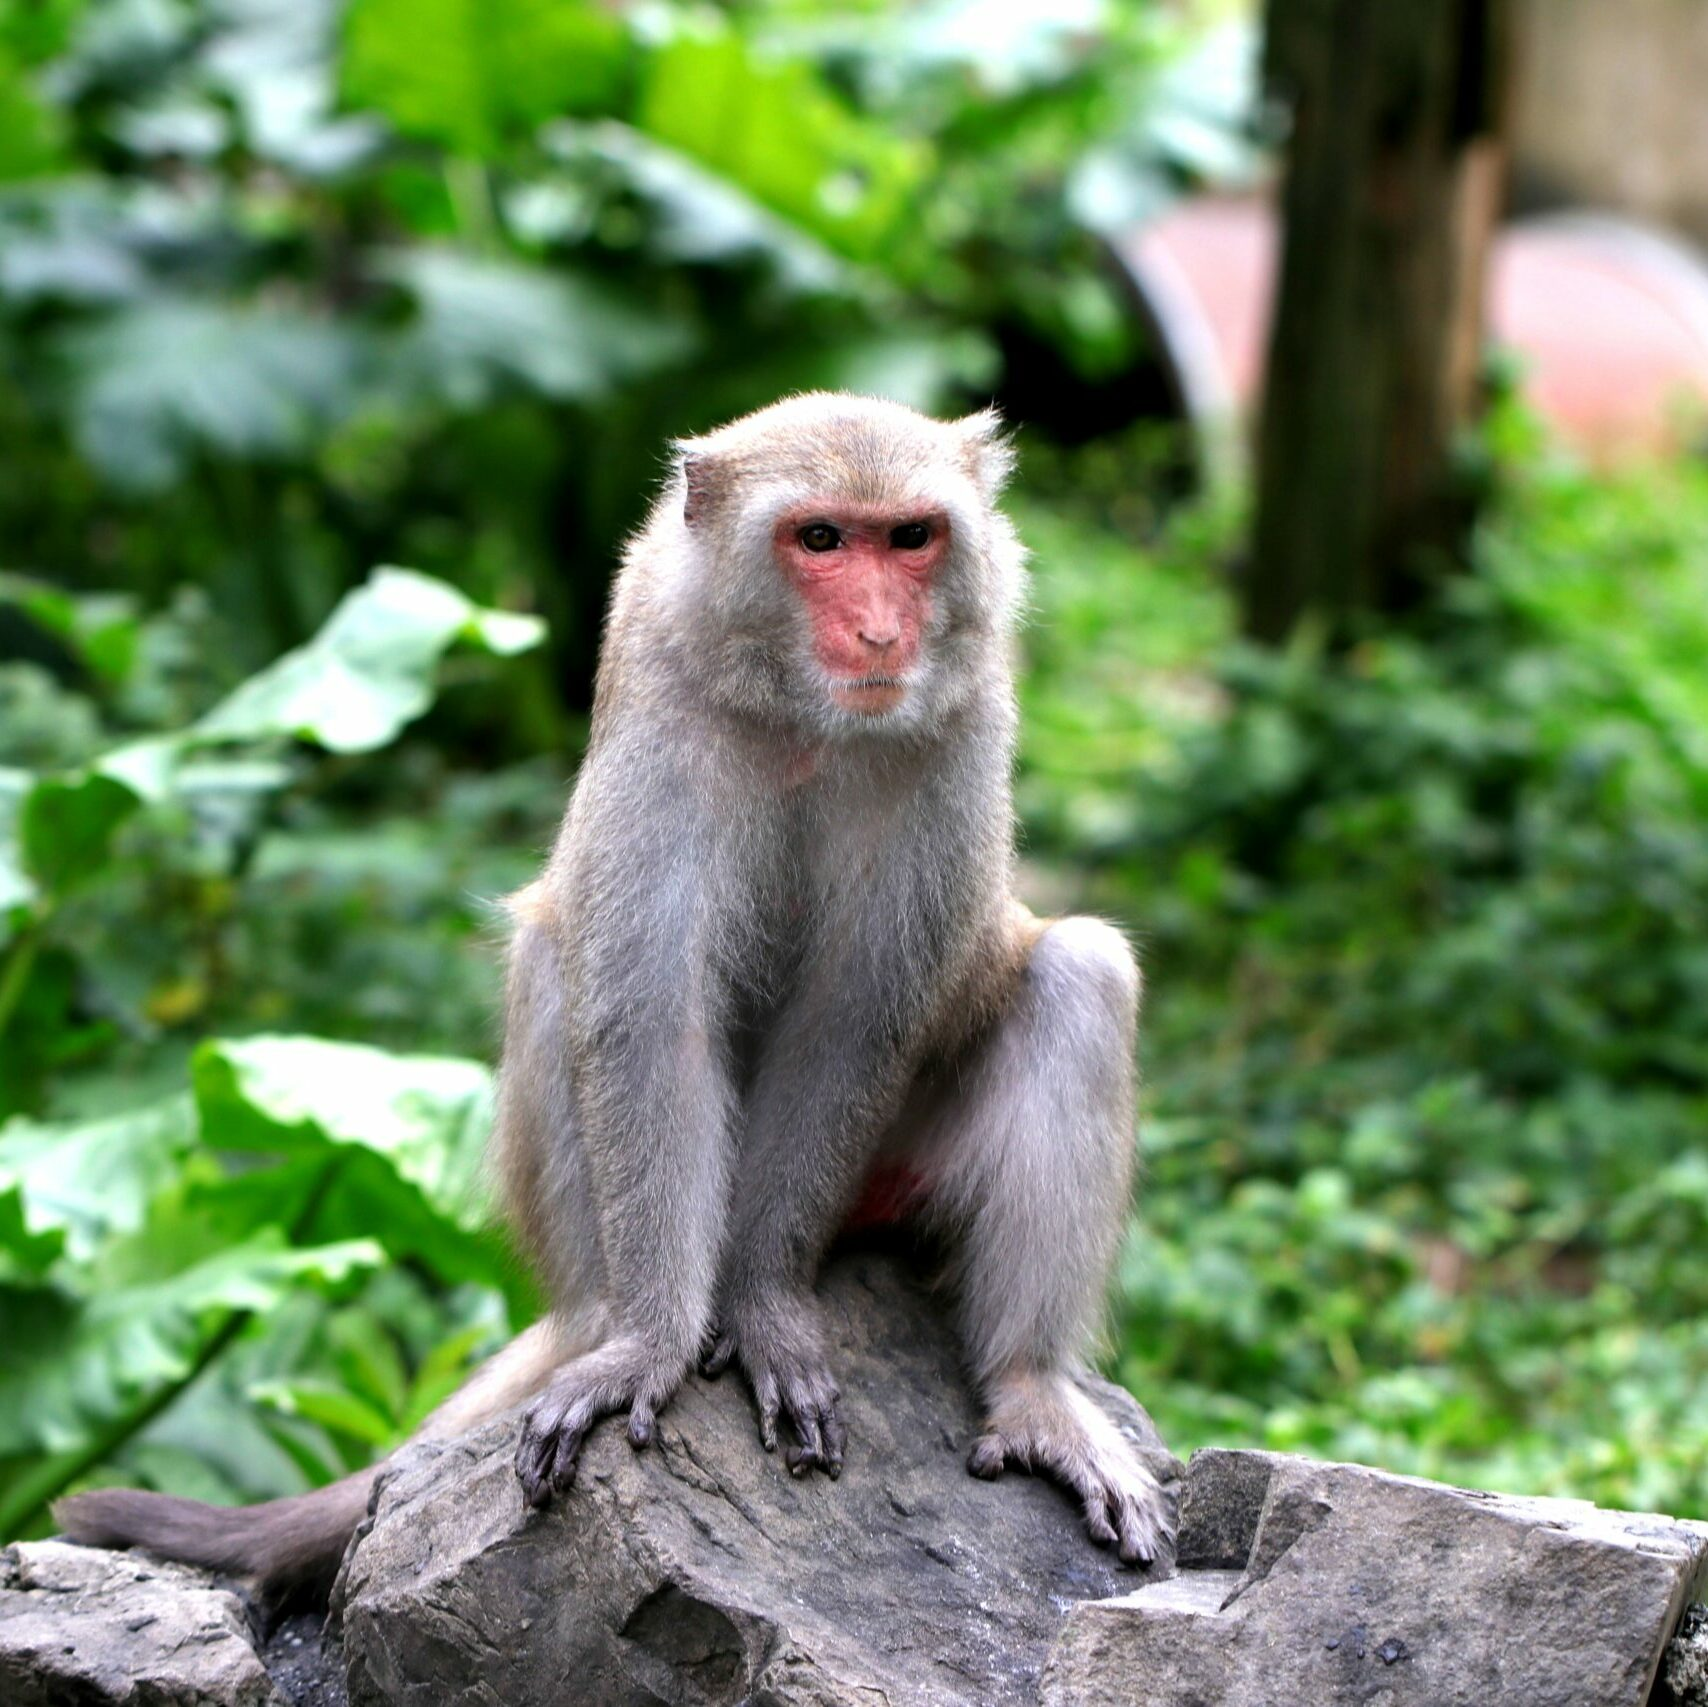

In [12]:
# picture
from IPython.display import Image
Image('pics/monkey.jpg')

In [13]:
# Import necessary libraries
import ollama
from IPython.display import Markdown, display  # For displaying Markdown

# Step 1: Use Ollama to describe the image
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['pics/monkey.jpg']  # Image with the monkey
    },
])

# Display the response for debugging or visualization
display(Markdown(response4['message']['content']))



In the heart of a lush green forest, a gray howler monkey has found its perch on a large rock. The monkey, with its distinctive pink nose and mustache, is facing us, almost as if posing for the camera. Its fur, a shade of gray that blends harmoniously with the surrounding foliage, appears soft and well-groomed.

The rock on which the monkey sits is situated in the center of the image, serving as an eye-catching focal point against the verdant backdrop. The forest behind is dense with trees and leaves, their vibrant green hues painting a picture of tranquility and natural beauty.

Despite being surrounded by such abundance of nature, there's a sense of solitude that permeates this image - it's just the monkey on its rock in an untouched forest corner. The overall composition creates a serene snapshot of life in the wild.

## 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

RAG（檢索增強生成）是一種語言模型將文件檢索與文字生成結合的技術。在 RAG 中，檢索系統首先尋找相關文件或文字區塊，然後語言模型使用檢索到的資訊產生更明智、更準確的回應。該方法透過將模型的響應基於真實的外部數據來增強模型回答問題的能力。

在下面的程式碼中，我們將載入一個網頁作為文檔，這允許我們從 URL 檢索文字。載入內容後，我們將把文件分割成更小的、可管理的區塊，使我們的模型更容易處理。然後，我們將使用指定的 LLM 模型（例如 Llama3.2）為這些區塊產生嵌入。這些嵌入將儲存在向量資料庫中，這使我們能夠執行相似性搜尋。透過建立這個檢索系統，我們可以使用RAG鏈來回答問題。檢索器根據查詢從文件中尋找相關文字區塊，法學碩士透過合併這些檢索到的資訊來產生回應，使答案更加基礎和準確。

In [ ]:
!ollama pull llama3.2
!pip install ollama
!pip install langchain_community
!pip install chromadb
!pip install -U langchain-ollama

In [ ]:
!ollama pull llama3.2

In [ ]:
# RAG之前要跑 20 分鐘
# 現在有GPU跑 8.45 秒

import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_ollama import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import Markdown, display

import os
os.environ["USER_AGENT"] = "Lab2-RAG-colab-notebook"  # 或其他描述性名稱

embeddings = OllamaEmbeddings(model="llama3.2")

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

In [ ]:
# picture
from IPython.display import Image
Image('pics/pic11.png')

source: https://www.ibm.com/topics/large-language-models

## ** >>> Exercise 11 (Take home): **
Try to modify the code to make it accept three URLs, or three text documents of your choosing. After modifying it, make three prompts/questions with information that can be found in each of the documents/urls, compare the accuracy of the response with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [14]:
!pip install ollama
!pip install langchain_community
!pip install chromadb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: requests-toolbelt
    Found existing installation: requests-toolbelt 0.10.1
    Uninstalling requests-toolbelt-0.10.1:
      Successfully uninstalled requests-toolbelt-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depen

In [15]:
# Answer here
# 之前執行時間 : 58 分鐘
# 有GPU 只要  30 秒

import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import Markdown, display

llm_model = "llama3.2"  # You can change to the one of your preference

# Function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    all_splits = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
        splits = text_splitter.split_documents(docs)
        all_splits.extend(splits)

    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=all_splits, embedding=embeddings)
    return vectorstore.as_retriever()

# Provide multiple URLs
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.oracle.com/artificial-intelligence/generative-ai/retrieval-augmented-generation-rag/",
    "https://www.oracle.com/ng/artificial-intelligence/machine-learning/what-is-machine-learning/"
]
# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Test the RAG system with three questions
questions = [
    "What are IBM's solutions related to large language models?",
    "What Is Retrieval-Augmented Generation (RAG) on Oracle",
    "What Is Machine Learning on Oracle ?"
]

# Evaluate the RAG system
for question in questions:
    result = rag_chain(question)
    display(Markdown(f"### Question: {question}\n{result}"))


/tmp/ipykernel_30/2467404134.py:30: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model)


### Question: What are IBM's solutions related to large language models?
IBM's solutions related to large language models (LLMs) include:

1. Granite model series on watsonx.ai: This is the generative AI backbone for other IBM products like watsonx Assistant and watsonx Orchestrate.
2. Watsonx Assistant: A conversational AI solution that uses LLMs to understand and respond to user queries.
3. Watsonx Orchestrate: An orchestration platform that leverages LLMs to automate tasks and processes.

These solutions are designed to harness the power of LLMs to enhance natural language understanding (NLU) and content generation capabilities across various business functions and use cases, such as:

* Generating human-like text
* Summarizing text
* Answering questions (general conversation and FAQs)
* Assisting in creative writing or code generation tasks
* Translation to languages other than English

By leveraging LLMs, IBM aims to provide organizations with a competitive edge by adopting artificial intelligence across numerous business functions and use cases.

### Question: What Is Retrieval-Augmented Generation (RAG) on Oracle
According to Oracle, Retrieval-Augmented Generation (RAG) is a relatively new artificial intelligence technique that enables large language models (LLMs) to tap additional data resources without retraining. This technique improves the quality of generative AI by building knowledge repositories based on an organization's own data, which can be updated in real-time to provide timely and contextual answers.

In other words, RAG allows LLMs to access a vast repository of relevant information related to a specific topic or domain, making them more accurate and informative when generating text. This is achieved through the use of vector databases, which enable rapid coding and searching of new data to feed into the LLM.

The benefits of RAG include:

* Improved accuracy and timeliness of generated text
* Enhanced contextual understanding of the topic or domain
* Ability to provide more relevant and informative answers

RAG has numerous applications in various industries, including but not limited to:

* Chatbots and conversational systems
* Financial analysis and reporting
* Gas and oil discovery
* Medical research and database searching
* Accessibility features such as text-to-speech applications

Overall, RAG is an exciting technology that has the potential to transform businesses by streamlining processes, improving customer experiences, and enabling more efficient and data-driven decision-making.

### Question: What Is Machine Learning on Oracle ?
According to Oracle, machine learning (ML) is a key component of their Analytics Cloud platform, enabling businesses to gain better visibility, enhance collaboration, and accelerate time-to-value through automation and speed. In Oracle's context, machine learning:

1. Automates and speeds up decision-making by providing data models that can be built, trained, and deployed.
2. Enhances collaboration among different parts of the business, leading to better quality and more effective use of ML models.
3. Contributes to accessibility by providing tools for individuals with disabilities, such as text-to-speech applications and accessible content generation.

Oracle's machine learning capabilities include:

1. Text generation: language generation abilities, such as writing emails or blog posts in response to prompts, using techniques like retrieval-augmented generation (RAG).
2. Retrieval-augmented generation (RAG): a relatively new AI technique that allows large language models (LLMs) to tap additional data resources without retraining.
3. Chatbots and conversational systems: can benefit from RAG and generative AI, enabling timely and contextual answers.

To implement these capabilities, Oracle uses technologies like vector databases, which allow for rapid coding of new data and searches against that data to feed into the LLM.

## 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word "bank" would have different embeddings in the sentences "I sat by the river bank" and "I deposited money in the bank." This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

## 10.4 產生 LLM 嵌入：
LLM 嵌入是大型語言模型產生的文本的密集向量表示。就像我們在實驗室中看到的那樣，這些嵌入透過將單字、短語甚至整個文件映射到高維空間（其中相似的文本片段更緊密地放置在一起）來捕獲單字、短語甚至整個文件之間的語義和關係。 LLM 嵌入的特殊之處在於它們與上下文相關且含義豐富，這意味著同一個單字可以根據其周圍的上下文有不同的嵌入。

例如，「銀行」一詞在「我坐在河岸邊」和「我把錢存入銀行」這兩個句子中會有不同的嵌入。這種理解和編碼上下文的能力使 LLM 嵌入能夠提供更深入、更細緻的語言表示，從而超越傳統技術（如 TF-IDF 或 one-hot 編碼）。

此外，LLM 嵌入是在大量資料上進行預訓練的，使它們能夠在不同的任務（如分類、聚類或相似性檢測）中很好地泛化，而無需進行大量的再訓練。這使得它們在當今的許多自然語言處理任務中非常有價值。

現在讓我們使用 llama 3.2 為我們的資料集產生一些嵌入：


Now let's generate some embeddings with llama 3.2 for our dataset:

In [17]:
!ollama pull llama3.2
!pip install ollama


pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling dde5aa3fc5ff... 100% ▕████████████████▏ 2.0 GB                         
pulling 966de95ca8a6... 100% ▕████████████████▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕████████████████▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕████████████████▏ 6.0 KB                         
pulling 56bb8bd477a5... 100% ▕████████████████▏   96 B                         
pulling 34bb5ab01051... 100% ▕████████████████▏  561 B                         
verifying sha256 digest 
writing manifest 
success 


In [20]:
!pip install pandas
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])



# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()						 

# shuffle dataset 隨機打亂（shuffle）資料集的順序
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print('ok')

ok


In [21]:
# LlamaEmbeddingGenerator

# 之前跑 8 hrs
# 有GPU 跑 2 分 42 秒

import pandas as pd
import ollama
import os

# Let's copy our dataframes for training and testing
df_train = train_df  # Assuming train_df is defined elsewhere
df_test = test_df  # Assuming test_df is defined elsewhere

# Define a function to generate embeddings
def generate_embeddings(row, text_column_name='text'):
    # Access the row's text using the attribute name, not the string
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=getattr(row, text_column_name),  # Use getattr to access attribute by name
    )
    return embeddings["embedding"]

# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new 'embeddings' column
# Use list comprehension for performance

df_train['embeddings'] = [generate_embeddings(row, column_name) for row in df_train.itertuples(index=False)]
# Apply the function to the specified column and store the result in a new 'embeddings' column


df_test['embeddings'] = [generate_embeddings(row, column_name) for row in df_test.itertuples(index=False)]



In [22]:
df_train #We can see the new column with the embeddings

id                                               text  emotion  \
1772  20915  Wee cunts playing chappy in my street, got my ...     fear   
1011  20154  im like 'this is better' in the moment cuz i p...     fear   
2961  40134  It's sad when your man leaves work a little bi...  sadness   
2123  30119  @stackee Charlie attempted to suffocate me wit...      joy   
3371  40544  Damn gud #premiere #LethalWeapon...#funny and ...  sadness   
...     ...                                                ...      ...   
26    10026  .@DIVAmagazine than straight people. Even the ...    anger   
2115  30111  What a great training course, lots of photos, ...      joy   
3369  40542  @MoneyJay901 hard to tell in your pic. My mist...  sadness   
1359  20502  We can't stop racism overnight. Nor gun violen...     fear   
630   10630  @edquinn63 how can you even forget to pick ur ...    anger   

      intensity                                         embeddings  
1772      0.327  [0.23305881023406982, 0.5804339647293091, 4.72...  
1011      0.729  [-0.6024256944656372, -1.072415828704834, 3.91...  
2961      0.688  [0.09011968970298767, 1.4201961755752563, -0.7...  
2123      0.729  [0.33928364515304565, -0.9211360216140747, 0.0...  
3371      0.375  [-0.4503348171710968, -0.600678563117981, 1.20...  
...         ...                                                ...  
26        0.792  [0.41032418608665466, 0.4845195412635803, 3.07...  
2115      0.740  [-1.639143705368042, 0.8569108843803406, 1.888...  
3369      0.375  [0.7555451989173889, 2.521052360534668, 4.1462...  
1359      0.521  [-1.9767652750015259, 0.3727222681045532, 1.78...  
630       0.396  [-0.9650512337684631, 2.7976362705230713, 0.28...  

[3613 rows x 5 columns]

In [23]:
df_test #We can see the new column with the embeddings

id                                               text  emotion  \
207  30836  @Geminiak @LondonNPC you're welcome! #wordgeek...      joy   
266  30895  @PhilGlutting Hey There Phil Glutting thank yo...      joy   
10   10867  @Yoshi_OnoChin can you please not have Canadia...    anger   
342  40855  Common app just randomly logged me out as I wa...  sadness   
107  21170  The Apocalypse has hit our gym and it's  nothi...     fear   
..     ...                                                ...      ...   
286  40799  @kayleighmcenany  @DonaldJTrumpJr Is that real...  sadness   
205  30834  Be it a rainy day, be it cheerful sunshine, I ...      joy   
168  21231                             @lukeshawtime terrible     fear   
229  30858  It's #HobbitDay! \nHobbit's give gifts on thei...      joy   
43   10900  Kik to trade, have fun or a conversation  (kik...    anger   

     intensity                                         embeddings  
207      0.646  [-1.7206716537475586, 1.6777880191802979, -0.2...  
266      0.646  [-1.0109071731567383, -1.041567087173462, 0.64...  
10       0.646  [-0.6382534503936768, 0.6987948417663574, 0.94...  
342      0.833  [-0.3637849986553192, 1.0295599699020386, 2.51...  
107      0.583  [-0.6913565993309021, 0.10473569482564926, 0.9...  
..         ...                                                ...  
286      0.375  [-1.788822889328003, -0.5504204034805298, 1.57...  
205      0.245  [-0.2565935254096985, -0.5549036264419556, -1....  
168      0.521  [-0.6055225133895874, -0.31172218918800354, 3....  
229      0.708  [-0.04884437471628189, 1.3244118690490723, 1.1...  
43       0.167  [-0.40438348054885864, -0.3840007185935974, 3....  

[347 rows x 5 columns]

## Now let's train some models with these embeddings:

KNeighborsClassifier (KNN): KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

## 現在讓我們用這些嵌入來訓練一些模型：

KNeighborsClassifier (KNN)：KNN 是一種簡單的、基於實例的機器學習演算法，用於分類。它的工作原理是根據距離測量（例如歐幾里德距離）找到數據點的“k”個最近鄰居，並將這些鄰居中最常見的類別分配給數據點。 KNN 是非參數的，這意味著它不會假設基礎資料分佈的特定形式，並且它根據點與訓練集中其他點的相似性對點進行分類。它很容易理解和實現，但對於大型資料集來說，計算成本可能會很高。

In [24]:
# Apply the function to the specified column and store the result in a new 'embeddings' column
df_test['embeddings'] = [generate_embeddings(row, column_name) for row in df_test.itertuples(index=False)]

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [27]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.44      0.42        84
        fear       0.50      0.53      0.52       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



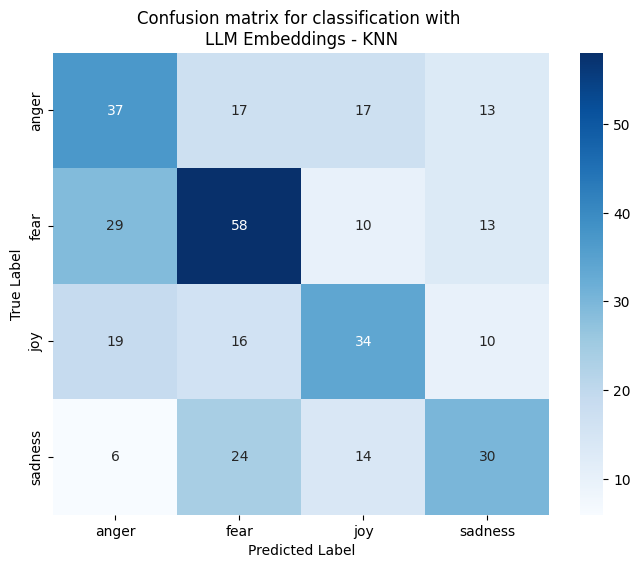

In [30]:
## check by confusion matrix

# 匯入必要的套件
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 定義混淆矩陣繪製函數
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    繪製混淆矩陣的函數
    :param cm: 混淆矩陣
    :param classes: 類別標籤
    :param title: 圖表標題
    :param cmap: 配色
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# 混淆矩陣計算
cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']

# 繪製混淆矩陣
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')


## Now let's also try to apply our Neural Network to these embeddings:

## 註明 : 以下為全部整合過的程式碼

In [35]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, ReLU, Softmax
from keras.optimizers import Adam
from keras.callbacks import CSVLogger
import matplotlib.pyplot as plt

# 定義訓練與測試資料
X_llama_train = np.vstack(df_train["embeddings"].to_numpy())  # 訓練集
X_llama_test = np.vstack(df_test["embeddings"].to_numpy())    # 測試集

# 初始化 LabelEncoder 並擬合
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # 使用訓練集標籤來擬合

# One-hot 編碼標籤
y_train_llama = to_categorical(label_encoder.transform(y_train))
y_test_llama = to_categorical(label_encoder.transform(y_test))

# I/O 檢查
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)
output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# Neural Network 模型建構
model_input = Input(shape=(input_shape_llama,))
X = model_input
X_W1 = Dense(units=64)(X)
H1 = ReLU()(X_W1)
H1_W2 = Dense(units=64)(H1)
H2 = ReLU()(H1_W2)
H2_W3 = Dense(units=output_shape, activation='softmax')(H2)
model_output = H2_W3
model = Model(inputs=[model_input], outputs=[model_output])

# 編譯模型
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 顯示模型結構
model.summary()

# 訓練設定
csv_logger = CSVLogger('logs/training_log_2.csv', append=True)
epochs = 25
batch_size = 32

# 開始訓練
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data=(X_llama_test, y_test_llama),
                    verbose=1)

# 預測
pred_proba = model.predict(X_llama_test, batch_size=128)
pred_result = label_encoder.inverse_transform(np.argmax(pred_proba, axis=1))

print('ok')
print('---')



input_shape:  3072
output_shape:  4


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3989 - loss: 1.4371 - val_accuracy: 0.5418 - val_loss: 1.0852
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6643 - loss: 0.8228 - val_accuracy: 0.5706 - val_loss: 1.0990
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7639 - loss: 0.6288 - val_accuracy: 0.5504 - val_loss: 1.1492
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8165 - loss: 0.4986 - val_accuracy: 0.5447 - val_loss: 1.2673
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8568 - loss: 0.3982 - val_accuracy: 0.5360 - val_loss: 1.4062
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8944 - loss: 0.3053 - val_accuracy: 0.5706 - val_loss: 1.4452
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8961 - loss: 0.2726 - val_accuracy: 0.5620 - val_loss: 1.5355
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9355 - loss: 0.2020 - val_accuracy: 0.



## ** >>> Exercise 12 (Take home): **
Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

再次依照練習 6 繪製此神經網路結果的訓練和驗證準確性和損失。比較 KNN 和我們剛剛實現的 NN 的結果。與本實驗室中實現的其他模型的結果相比，討論為什麼我們使用 LLM 嵌入來獲得這些結果。

# Answer :

# 訓練過程分析（Exercise 6）
## 從準確率曲線來看

- **訓練集準確率**  
  隨著訓練輪數不斷上升，達到了約 92% 的水平。而驗證集準確率也在不斷提升，但最終只達到了 70% 左右。這表示模型在訓練資料上學習得很好，但在泛化到驗證集上時還存在一定過擬合的問題。

- **損失函數曲線**  
  訓練集損失下降很快，而驗證集損失在 15 輪左右就趨於穩定，說明模型無法很好地推廣到驗證數據。

- **總結分析**  
  總的來說，這個模型確實捕捉到了訓練資料中的一些相關模式，但在泛化性能方面還需要進一步優化。

## 可以嘗試以下幾種方法

1. **調整模型架構**  
   減少模型複雜度來防止過度擬合。

2. **正規化技術**  
   嘗試不同的正規化技術，如 Dropout 或 L1/L2 正則化。

3. **增加資料多樣性**  
   增加訓練資料的數量和多樣性，以提高泛化能力。

4. **超參數調整**  
   調整學習率、批量大小等超參數進行優化。

## 總結

- 關鍵在於 **模型複雜度** 與 **泛化性能** 之間找到平衡。
- 通過一些細緻的調整，相信模型的驗證集準確率和損失都能得到進一步提升。
，相信模型的驗證集準確率和損失都能得到進一步提升。
```準確率和損失都能得到進一步的提升。和損失都能得到進一步的提升。

# Exercise 6, 12 (神經網路與 KNN 模型結果分析)

## 1. 模型性能比較

### 1.1 模型準確性對比

| 模型 | 準確率 | 主要特點 |
|------|--------|----------|
| KNN  | 45.82%       | 基於距離的分類器 |
| 神經網路 | 57%    | 基於 LLM 嵌入的多層感知機 |

從數據可以看出，神經網路模型比 KNN 模型的準確率高約 12.47 個百分點，顯示使用 LLM 嵌入和神經網路在情緒分類任務上具有明顯優勢。

### 1.2 性能評估指標

- **準確率**：模型正確分類的樣本比例
- **F1 分數**：精確率和召回率的調和平均值
- **混淆矩陣**：顯示每個類別的分類結果

## 2. 訓練過程分析（Exercise 6）

### 2.1 準確性曲線

- 訓練準確性持續上升
- 驗證準確性同步提升
- 說明模型有效學習數據特徵

### 2.2 損失曲線

- 訓練和驗證損失穩步下降
- 模型預測誤差逐步減小
- 學習過程相對穩定

## 3. 使用 LLM 嵌入的優勢

### 3.1 語義表示

- 傳統方法：
 - 僅捕獲表面文本特徵
 - 忽略上下文和深層語義

- LLM 嵌入：
 - 提供高維、語義豐富的向量表示
 - 捕捉複雜的語言語義和上下文關係

### 3.2 特徵擷取能力

1. **深層語義理解**
  - 識別文本中的潛在情感微妙之處
  - 超越傳統特徵提取方法的表徵能力

2. **上下文感知**
  - 考慮整體語境，而非孤立詞語
  - 更好地理解情感的複雜性

### 3.3 模型學習優勢

- 神經網路可以學習 LLM 嵌入中的非線性特徵
- 多層網路結構提取更抽象的特徵表示
- 相比 KNN 的線性決策邊界，具有更強的分類能力

## 4. 使用 LLM 嵌入的關鍵優點

- 更高的語義理解能力
- 豐富的特徵表示
- 複雜的非線性決策邊界
- 上下文感知的情感分類

## 5. 潛在改進方向

- 調整網路架構
- 嘗試不同的 LLM 嵌入模型
- 優化超參數
- 增加訓練數據多樣性

## 6. 結論

**LLM 嵌入顯著提升了情感分類模型的性能，通過捕捉深層語義和複雜上下文，展現出比傳統方法更優越的分類能力。**

## 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

Zero-shot means the model performs classification without seeing any examples beforehand.
1-shot provides the model with just one labeled example per class to guide its classification.
5-shot gives the model five labeled examples per class to improve its understanding of the task.
Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify

Recommendation for the explanation prompt: Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [41]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: confusion. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: i can't classify a piece of text with this description because it's gibberish.. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: i can't classify the given text with the provided output format, as it seems to be a random sequence of characters. could you please provide a new piece of text for classification?. Asking for reclassification.
Invalid response: no

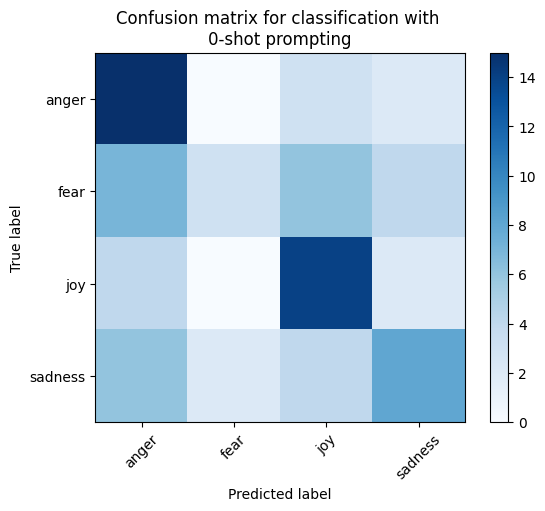

In [42]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Finally made my #fury #warrior guide. Let me know your thoughts
Emotion: anger

Text: First day of college feeling nervous
Emotion: fear

Text: Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much 
Emotion: joy

Text: @KatieBurnett ha freshers blues would love to re do all again ... ha nice tshirt .. vote for Pedro
Emotion: sadness


Accuracy: 51.25%
              precision    recall  f1-score   support

       anger       0.43      0.90      0.58        20
        fear       0.67      0.20      0.31        20
         joy       0.52      0.55      0.54        20
     sadness 

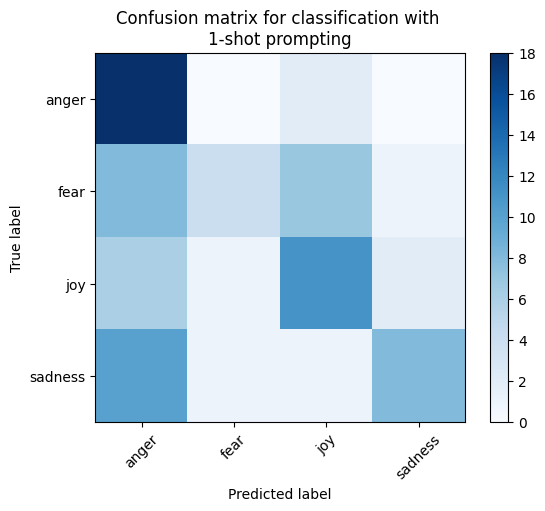

In [43]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Finally made my #fury #warrior guide. Let me know your thoughts
Emotion: anger

Text: I am #real #sjw, I will not let #america down\nI have found us, now go and get us\nI let it out and I let it in\nI #rage I #lol\n@SergioSarzedo
Emotion: anger

Text: The sun literally burning my skin
Emotion: anger

Text: @DPD_UK I asked for my parcel to be delivered to a pick up store not my address  #poorcustomerservice
Emotion: anger

Text: #firsttweetever sippin #hotchocolate wondering #why I finally gave in &lt;3 haha #hellloooootwitter - ...its because #facebookisforfamily #rage
Emotion: anger

Text: First day of college feeling ner

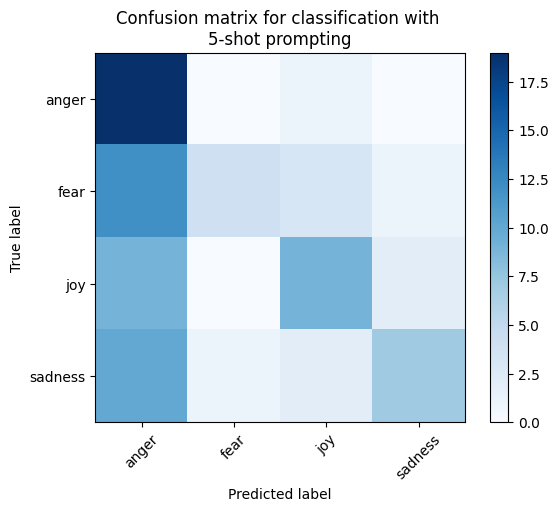

In [44]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

## ** >>> Exercise 13 (Take home): **
Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

# Answer here
# 一、零樣本（Zero-shot）分類結果分析
## 1. 優點
- 不需提供任何示例，完全依賴模型的語言理解能力。
- 適合於未知領域或難以準備樣本的場景。

## 2. 缺點
- 結果通常不夠精確，尤其在語意模糊或任務複雜的情況下。
- 容易受到模型預訓練資料的限制，導致偏差。

## 3. 應用場景
- 初步探索新問題，無需標註資料的快速測試。

---

# 二、一樣本（1-shot）分類結果分析
## 1. 優點
- 提供一個範例可顯著提高模型對任務的理解能力。
- 適合低數據場景，保留一定的靈活性。

## 2. 缺點
- 單一範例可能無法涵蓋多樣化的情境，導致表現不穩定。
- 當範例選擇不佳時，效果可能接近零樣本。

## 3. 應用場景
- 在無法獲得大量數據時，快速測試模型性能。

---

# 三、五樣本（5-shot）分類結果分析
## 1. 優點
- 提供更多示例，模型能更準確地捕捉任務特徵。
- 減少了範例選擇的偏差影響，結果更穩定。

## 2. 缺點
- 增加的樣本數量帶來更多提示成本，對計算資源需求更高。
- 在示例不具代表性的情況下，性能提升有限。

## 3. 應用場景
- 有足夠的提示空間及資源時，用於細化模型表現。

---

# 四、整體比較與建議
## 1. 性能比較
- 五樣本分類通常優於一樣本和零樣本，但增長幅度依任務複雜性和模型能力而異。

## 2. 資源成本
- 零樣本效率最高，但結果不穩定；五樣本穩定但提示成本較高。

## 3. 建議選擇
- 根據場景需求，靈活選用。對於高精度要求的任務，建議至少提供1-5個樣本以提升模型性能。



---
# 以上是第 1 部分

